# Exploratory Data Analysis
---
This notebook aims to explore the data collected. A series of graphs specific for time series data will be used. The distribution of stats and salaries will also be explored.

## Import Libraries
---

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

pd.set_option('display.max_rows', None)

## Functions Implemented
---

In [2]:
# Code modified from code written by Matthew Garton.

def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=15);

## Exploring a Batter for Time Series
---

In [3]:
df = pd.read_csv('../data/clean_players_bat/Enrique-Hernandez-571771.csv')
df.head()

,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,AVG,OBP,SLG,OPS
2018-03-29,4,2,0,0,0,0,0,0,2,0,0.000,0.500,0.000,0.500
2018-03-31,4,3,1,1,1,0,0,1,0,0,0.200,0.375,0.400,0.775
2018-04-01,4,4,1,2,1,0,0,2,0,1,0.333,0.417,0.556,0.972
2018-04-02,1,1,0,0,0,0,0,0,0,1,0.300,0.385,0.500,0.885
2018-04-03,3,2,0,0,0,0,0,0,1,0,0.250,0.375,0.417,0.792


In [4]:
df.shape

(457, 14)

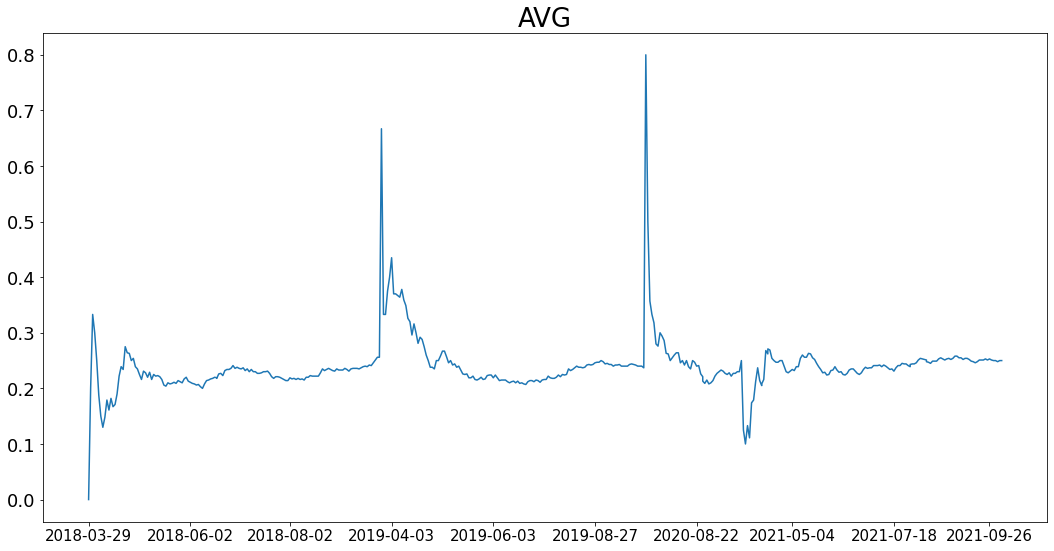

In [5]:
plot_series(df, ['AVG'], title = "AVG", steps= 50)

The spikes in the AVG is due to the fact that the stats are reset for the beginning of each season. If the player does well in the first few games his AVG will be really high and vice versa if the player does badly in the beginning of the season.

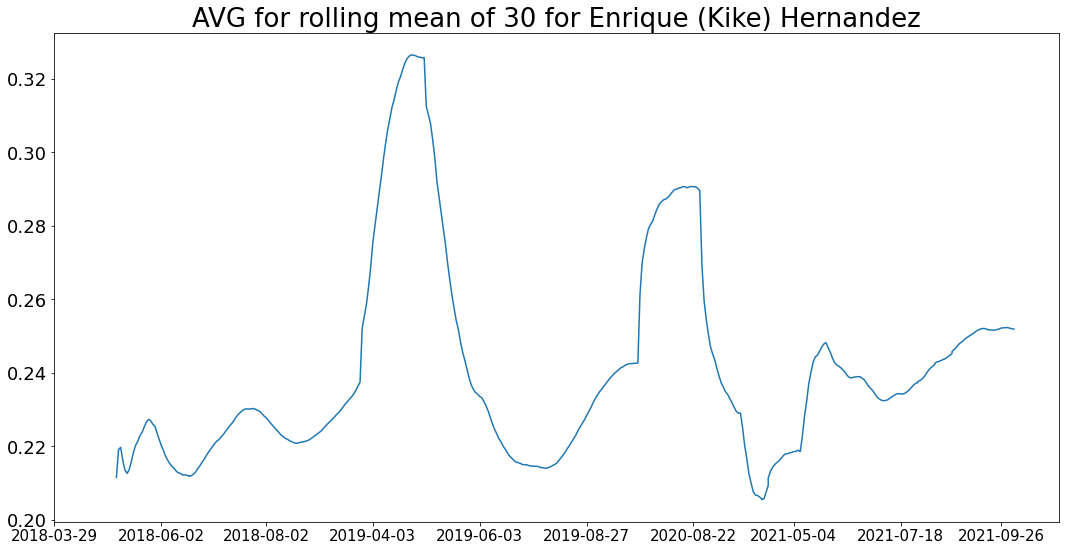

In [6]:
games_30 = df.rolling(30).mean()
plot_series(games_30, ['AVG'], title = "AVG for rolling mean of 30 for Enrique (Kike) Hernandez", steps= 50)

There seems to be a trend towards the 2021 season and typically when the season is almost at the end. Kike looks like for this season to have an upward trend. Besides that his average has had a pretty stationary trend.

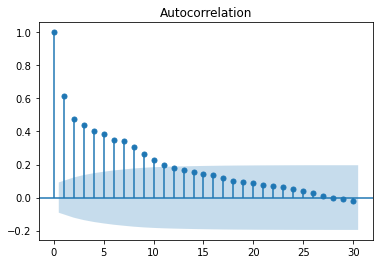

In [7]:
plot_acf(df['AVG'], lags = 30);

Since there are large and positive values for the lower lags, there is a trend in the data. As for seasonality, a scallop shaped must be present but there is not one. This means the data has no seasonlity.

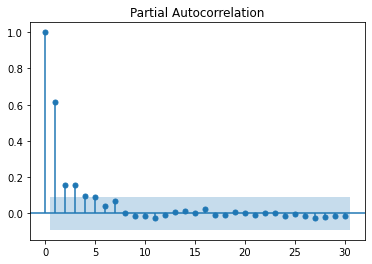

In [8]:
plot_pacf(df['AVG'], lags = 30);

There does not seem to have a pattern of fluctuations which means this data has no seasonlity

## Exploring Pitcher for Time Series

In [9]:
df = pd.read_csv('../data/clean_players_pitch/Max-Scherzer-453286.csv')
df.head()

,W,L,ERA,IP,H,ER,HR,BB,SO,WHIP
2018-03-30,1,0,0.00,6.0,5,0,0,1,10,1.00
2018-04-04,0,1,1.64,5.0,6,2,1,2,7,1.27
2018-04-09,1,0,0.90,9.0,2,0,0,0,10,0.80
2018-04-14,1,0,1.33,7.0,1,2,1,1,11,0.67
2018-04-20,1,0,1.36,6.0,4,1,0,3,9,0.76


In [10]:
df.shape

(102, 10)

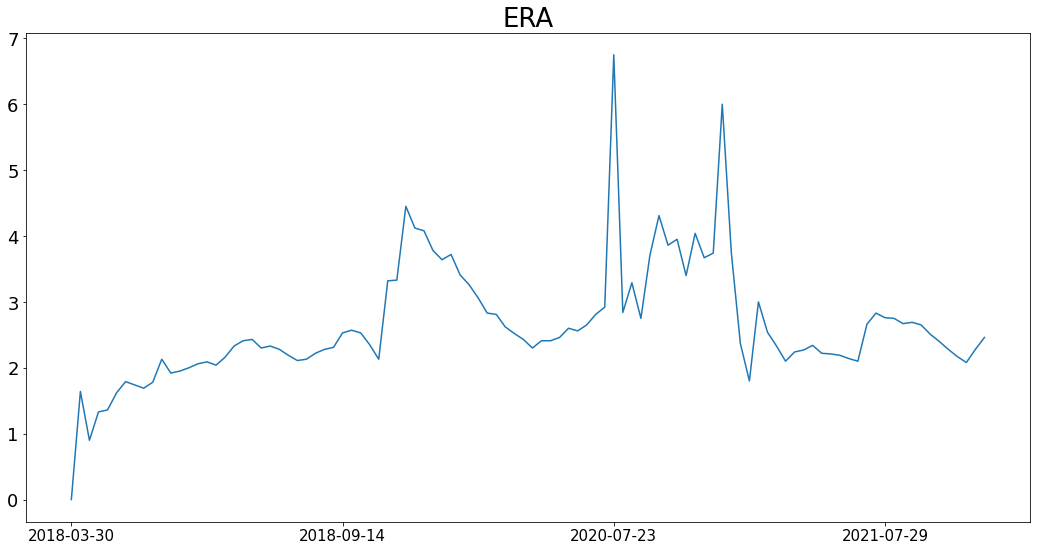

In [11]:
plot_series(df, ['ERA'], title = "ERA", steps= 30)

There does not seem to be any consistent fluctuations in the data. There is a considerable spike around 2020-07-23.

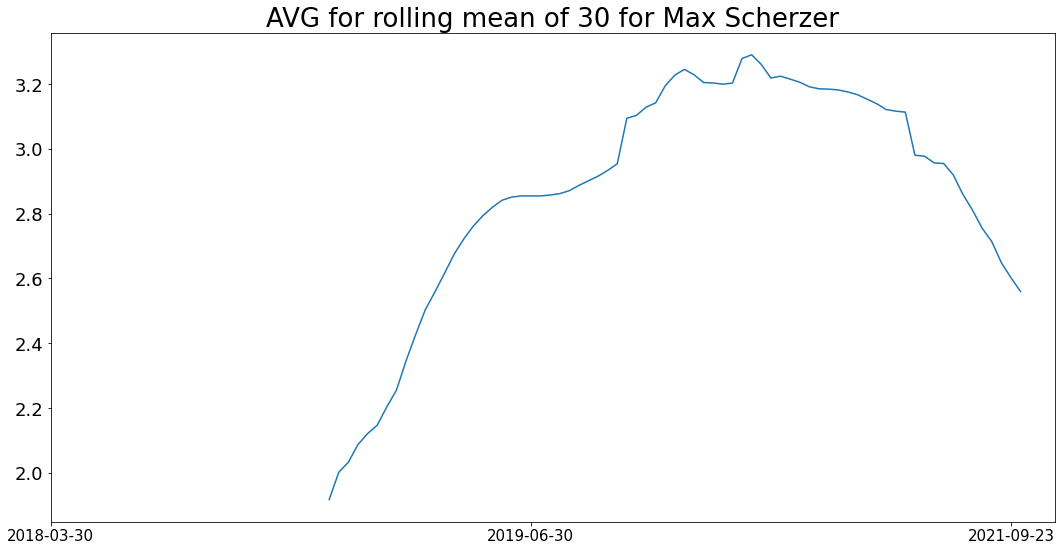

In [12]:
games_30 = df.rolling(30).mean()
plot_series(games_30, ['ERA'], title = "AVG for rolling mean of 30 for Max Scherzer", steps= 50)

It looks like had a very high ERA in 2020 which means he pitched bad during that season. But as he gets into 2021 his ERA has started to trend down.

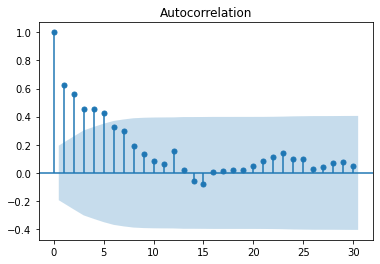

In [13]:
plot_acf(df['ERA'], lags = 30);

There is a trend in the data because there is positive large values in the lower lags. There is no obvious scallop shape which means the data has no seasonlity.

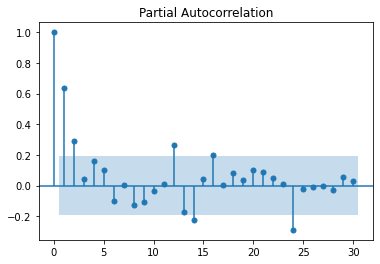

In [14]:
plot_pacf(df['ERA'], lags = 30);

There is no obvious patterns in the fluctuations which means that the data has no seasonlity

## Exploring Stats and Salaries of Batters
---

In [15]:
bat = pd.read_csv('../data/mlb_players_bat.csv').drop('Unnamed: 0', axis = 1)
bat.head()

,MLBID,FIRSTNAME,LASTNAME,Player,Team,Pos,Age,G,AB,R,...,3B,HR,RBI,BB,SO,AVG,OBP,SLG,OPS,salary
0,547989,Jose,Abreu,Jose Abreu,CWS,1B,34,152,566,86,...,2,30,117,61,143,0.261,0.351,0.481,0.832,"$17,666,666"
1,642715,Willy,Adames,Willy Adames,TB,SS,26,41,132,16,...,1,5,15,10,51,0.197,0.254,0.371,0.625,"$590,000"
2,501303,Ehire,Adrianza,Ehire Adrianza,ATL,SS,32,109,182,32,...,2,5,28,21,42,0.247,0.327,0.401,0.728,"$1,500,000"
3,542583,Jesus,Aguilar,Jesus Aguilar,MIA,1B,31,131,449,49,...,0,22,93,46,93,0.261,0.329,0.459,0.788,"$4,500,000"
4,605113,Nick,Ahmed,Nick Ahmed,ARI,SS,31,129,434,46,...,3,5,38,34,104,0.221,0.280,0.339,0.619,"$8,125,000"


In [16]:
# Convert salary from object to int
bat['salary'] = bat['salary'].str.replace(',', '').str.replace('$', '').astype(int)

#Copied from https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python

<ipython-input-16-1a7f071d8b6c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  bat['salary'] = bat['salary'].str.replace(',', '').str.replace('$', '').astype(int)


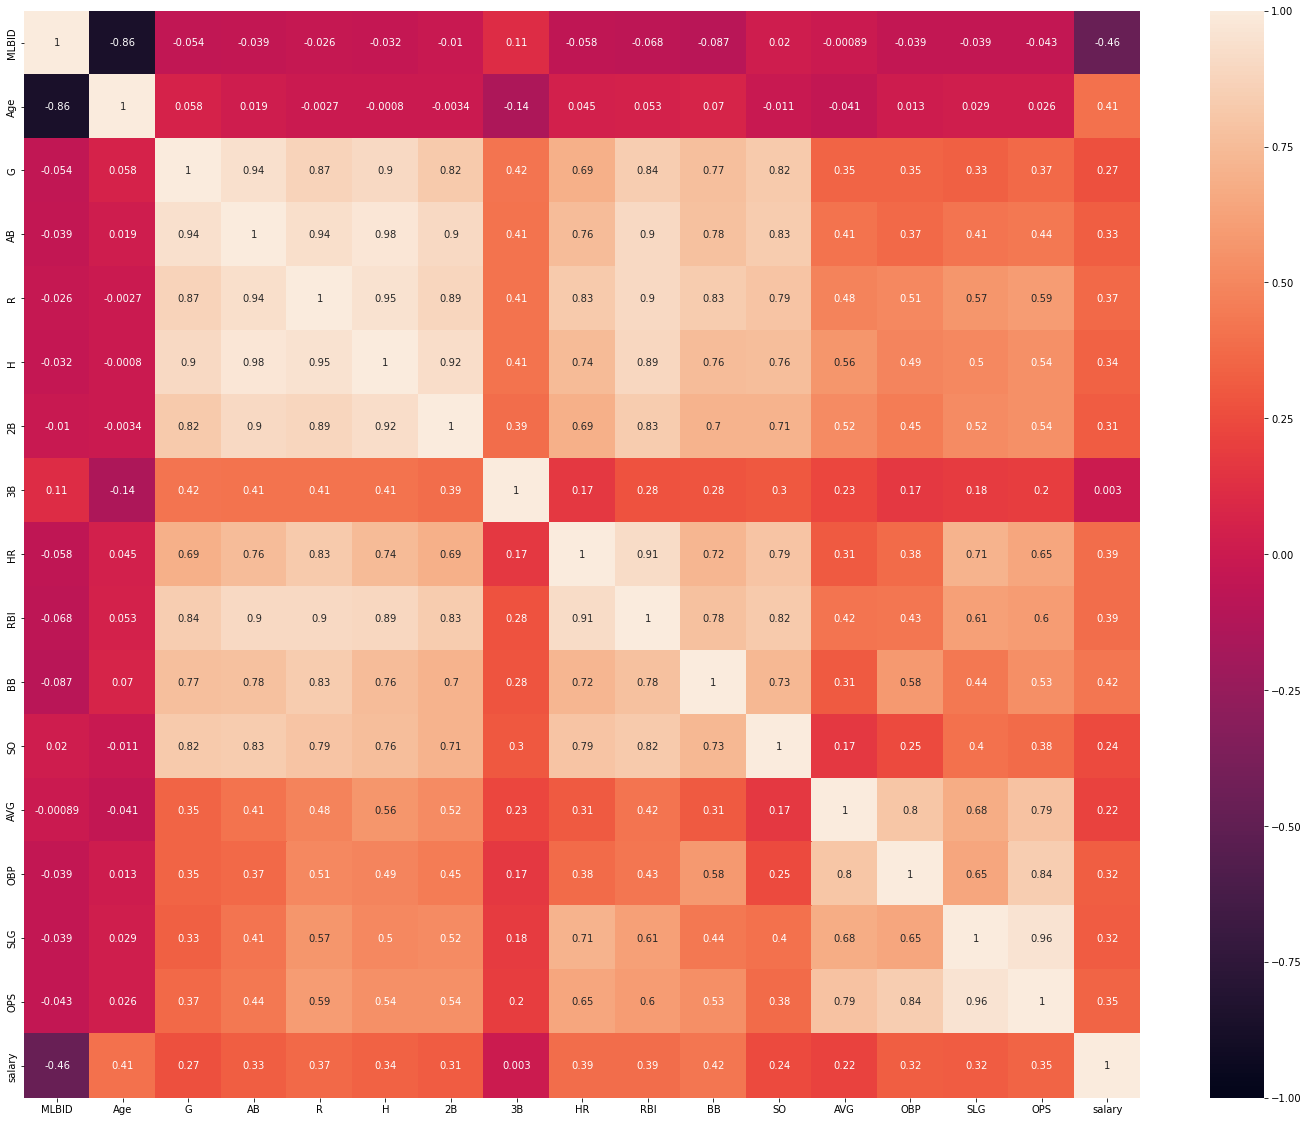

In [17]:
corr_matrix = bat.corr()

plt.figure(figsize=(25,20))

sns.heatmap(corr_matrix,
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'rocket');

#copied from lesson 3.04

This is the correlation of all stats and salary of batters. Many of the stats are very highly correlare with each other with some even reaching 1. This makes sense the more hits a player has the more runs, home runs, or runs batted in they can have. For salary there is no stat that it is highly correlated with. A triple (3B) even has a very low correlation with salary. 

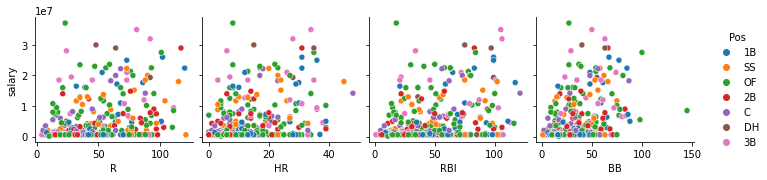

In [18]:
sns.pairplot(data = bat, 
             y_vars=['salary'],
             x_vars = ['R',
                     'HR',
                     'RBI',
                     'BB'], 
             hue = 'Pos',
              diag_kind=None);

This is the salary based on how many runs (R), home runs(HR), runs batted in(RBI), or walks(BB) a player has and the color represents the position of the batter. None of the graphs show any distinct pattern. Walks probably is the most disiguishable with a slight linear pattern. The other thing to note is that many players have a low salary but they could be performing well.

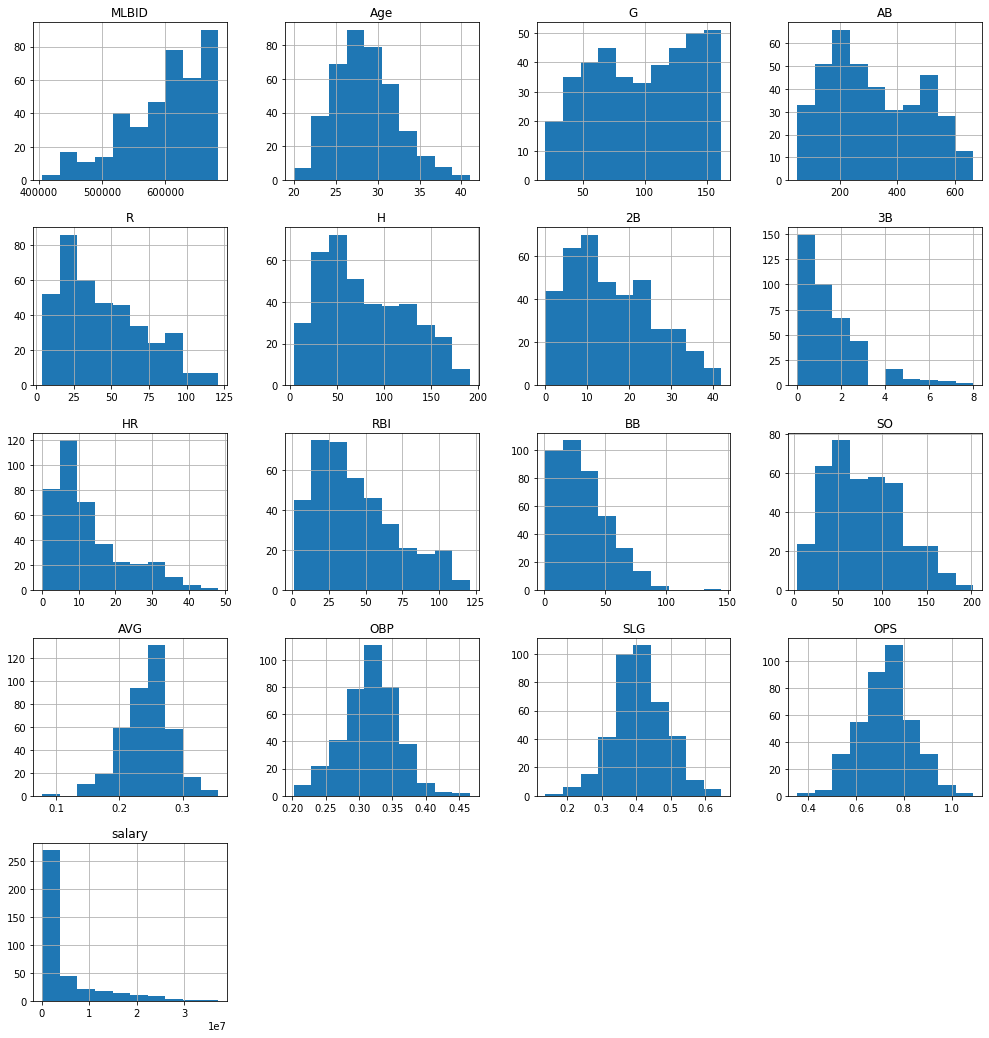

In [19]:
bat.hist(figsize = (17, 18));

Many of the stats as well as the salary is left skewed. The average(AVG), on base percentage(OBP), slugging(SLG) and on base plus slugging percentage (OPS) have a normal distribution. 

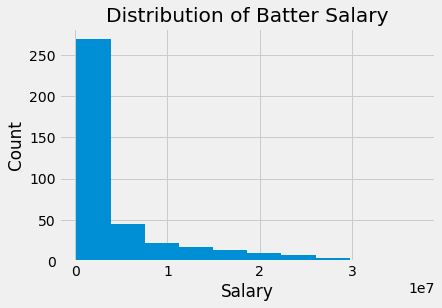

In [30]:
plt.style.use('fivethirtyeight')
bat['salary'].hist()

plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Distribution of Batter Salary');

Just to look at the Batter salary closer. It is highly left skewed with over half of the batters having a salary of less than 5 million.

## Exploring Stats and Salaries of Pitchers
---

In [20]:
pitch = pd.read_csv('../data/mlb_players_pitch.csv').drop('Unnamed: 0', axis = 1)
pitch.head()

,MLBID,FIRSTNAME,LASTNAME,Player,Team,Age,W,L,ERA,IP,H,ER,HR,BB,K,WHIP,salary
0,472551,Fernando,Abad,Fernando Abad,BAL,35,0,0,5.60,17.2,23,11,1,7,10,1.70,"$570,500"
1,676265,Cory,Abbott,Cory Abbott,CHC,26,0,0,6.75,17.1,20,13,7,11,12,1.79,"$570,500"
2,642758,Domingo,Acevedo,Domingo Acevedo,OAK,27,0,0,3.27,11.0,9,4,3,4,9,1.18,"$570,500"
3,613534,Austin,Adams,Austin Adams,SD,30,3,2,4.10,52.2,28,24,1,35,76,1.20,"$580,200"
4,669211,Keegan,Akin,Keegan Akin,BAL,26,2,10,6.63,95.0,110,70,17,40,82,1.58,"$570,500"


In [21]:
# Convert salary from object to int
pitch['salary'] = pitch['salary'].str.replace(',', '').str.replace('$', '').astype(int)

#Copied from https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python

<ipython-input-21-d5ce2f1897cb>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  pitch['salary'] = pitch['salary'].str.replace(',', '').str.replace('$', '').astype(int)


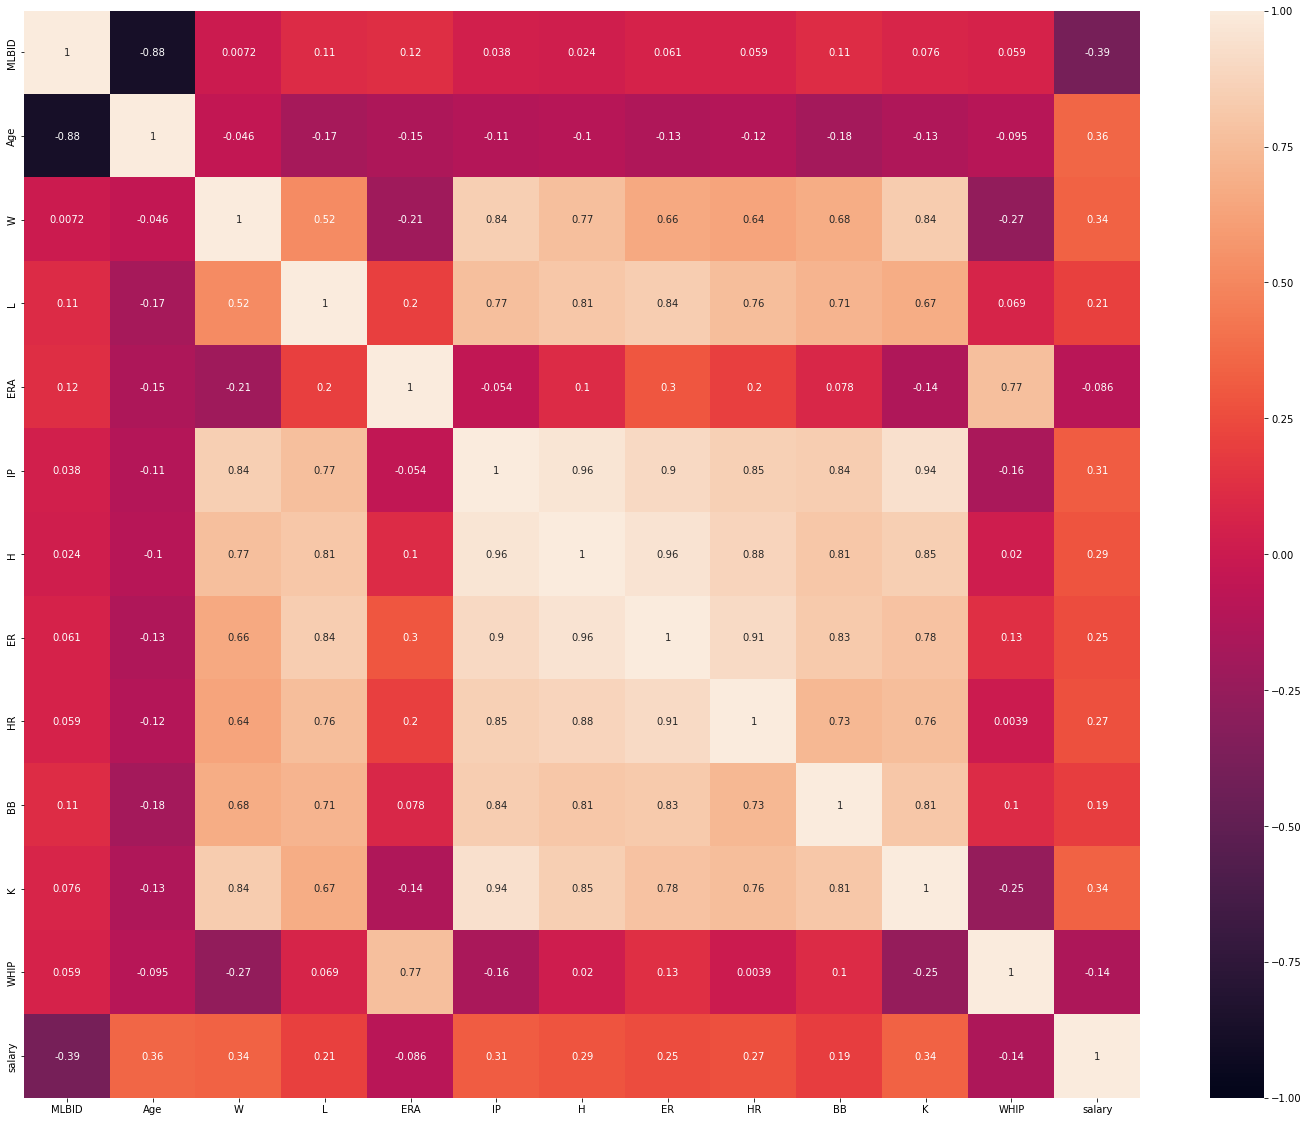

In [22]:
corr_matrix = pitch.corr()

plt.figure(figsize=(25,20))

sns.heatmap(corr_matrix,
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'rocket');

#copied from lesson 3.04

Like the stats for batters, the stats for pitchers are very highly correlated with each other. The stats that are not highly correlated is earned run average(ERA) and walks/hits per inning pitch (WHIP). As for salary it is not very correlated with the stats with even some almost being 0. 

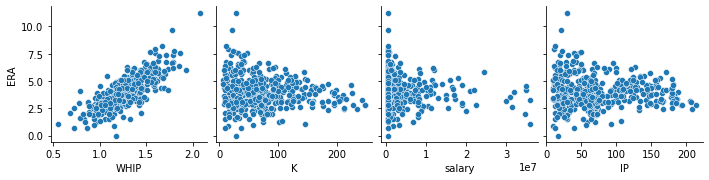

In [23]:
sns.pairplot(data = pitch, 
             y_vars=['ERA'],
             x_vars = ['WHIP',
                     'K',
                     'salary',
                     'IP'], 
              diag_kind=None);

Based on the heatmap, it would be behooving to look at ERA further. It makes sense that ERA and WHIP would be higly correlated because the a greater ERA means a pitchers let more people score. WHIP is walks and hits per inning pitched. If a pitcher has a high WHIP means they are more likely to let batters score. It makes sense that the correlation for ERA and strikeout(K) would be a straight line at zero. If a pitcher strikesout the batter less likely that a run will score. As for the salary it sort of makes sense as there are plenty of "rookie" pitchers. There are only a handful of really good pitchers and they are typically starting pitchers which allows them that higher ERA because they are expected to pitch more. 

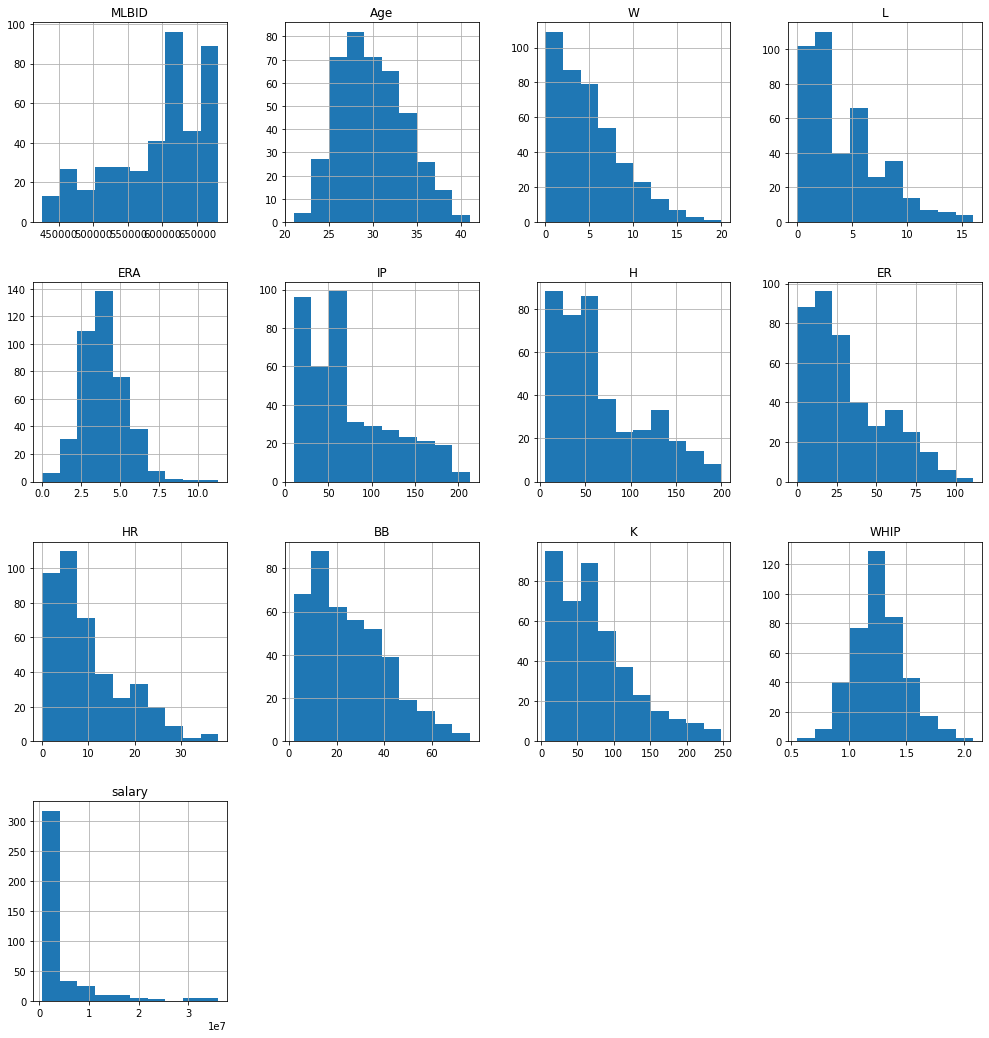

In [24]:
pitch.hist(figsize = (17, 18));

All the stats aside from ERA and WHIP are left skewed.

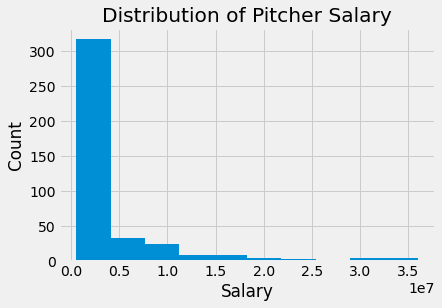

In [33]:
plt.style.use('fivethirtyeight')
pitch['salary'].hist()

plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Distribution of Pitcher Salary');

Salary is heavily skewed to the left with having well over pitchers making less than 5 million. There also seems to be a break between pitchers making 25 million and around 20 million.

## Recap
---
Explored the time series data, batter salary and stats, and pitcher salary and stats. This information will allow for better modeling decisions. 